<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/Sample_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries and Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load Dataset
df = pd.read_csv('heartdisease.csv')  # Replace with your dataset path

# 2. Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Income'}, xlabel='HeartDiseaseorAttack', ylabel='count'>

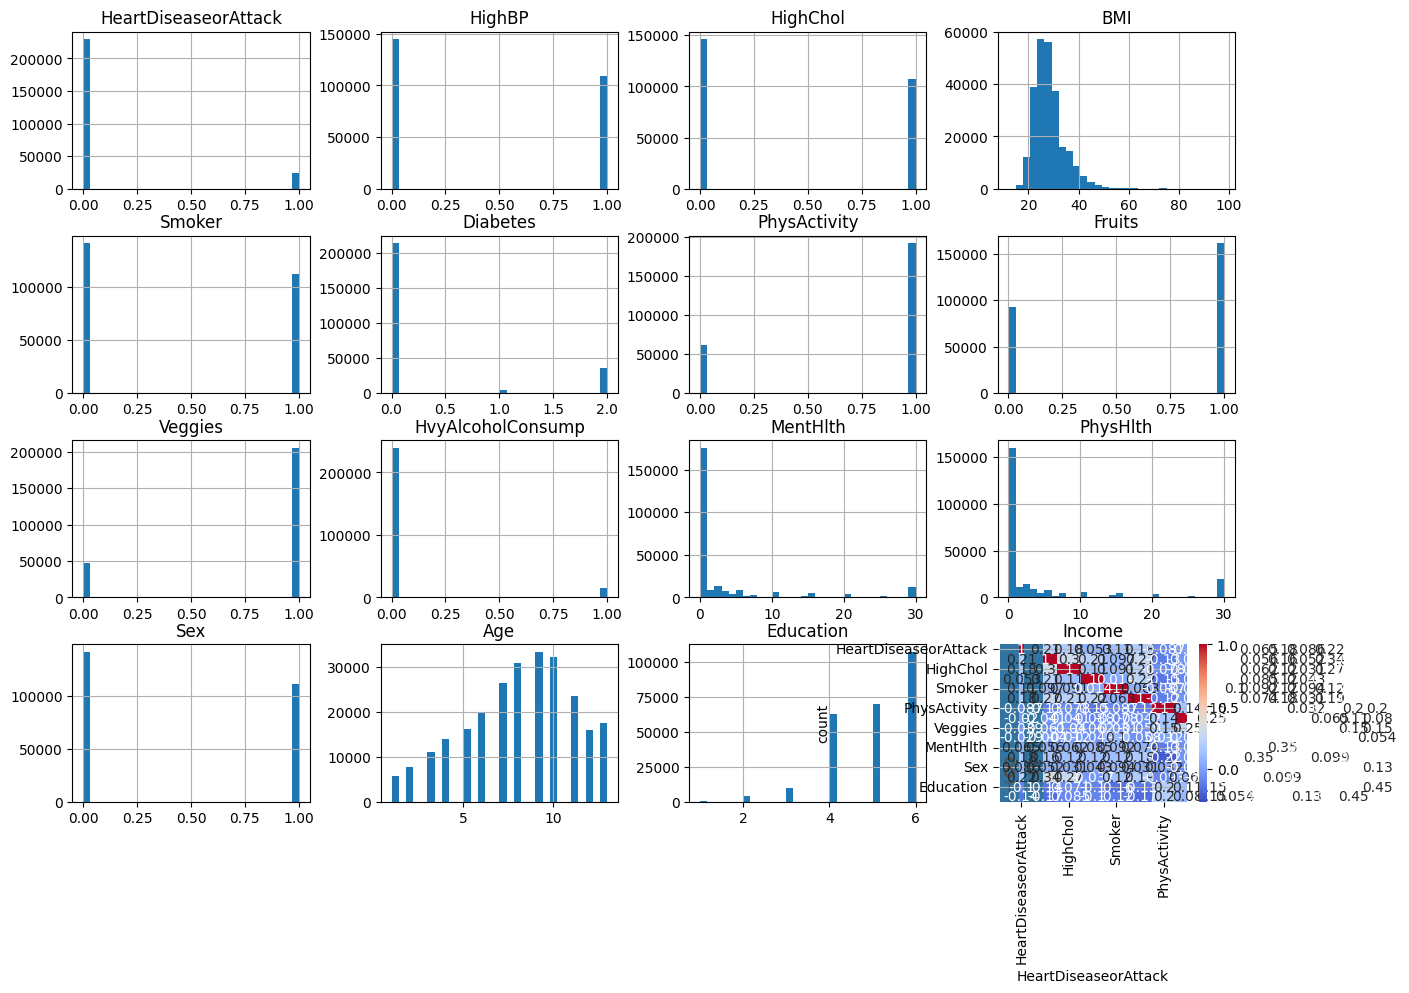

In [2]:
# Univariate Analysis
df.describe()  # Descriptive statistics
df.hist(bins=30, figsize=(15, 10))  # Histograms

# Multivariate Analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Correlation heatmap

# Target Variable Analysis
sns.countplot(x='HeartDiseaseorAttack', data=df)

# Feature-Target Relationships
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df)

# 3. Feature Engineering

In [4]:
# Feature Engineering
df['HealthScore'] = df['MentHlth'] + df['PhysHlth']
df['DietaryHealth'] = df['Fruits'] + df['Veggies']
df['Age_BMI_Interaction'] = df['Age'] * df['BMI']
df['Chol_BP_Interaction'] = df['HighBP'] * df['HighChol']

# 4. Binary Classification Experimentation Space

In [5]:
# Data Splitting
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 5. Precision-Recall Curves

In [10]:
plt.install_sklearn()

AttributeError: module 'matplotlib.pyplot' has no attribute 'install_sklearn'

In [9]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# Precision-Recall Curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

# 6. Model Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.51      0.08      0.13      4768

    accuracy                           0.91     50736
   macro avg       0.71      0.53      0.54     50736
weighted avg       0.87      0.91      0.87     50736

[[45612   356]
 [ 4398   370]]


# 7. Addressing Class Imbalance

In [12]:
from imblearn.over_sampling import SMOTE

# Handling Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 8. Model Pipeline

In [13]:
# Model Pipeline
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HighBP', 'HighChol',
                                                   'Smoker', 'Diabetes',
                                                   'Fruits', 'Veggies'])])),
                ('classifier', LogisticRegression())])